# Case Study 2
## Anish Bhandari

In [1]:
import pandas as pd

data = pd.read_csv("C:\\Users\\bhand\\OneDrive\\Desktop\\Quantifying the World\\Case Studies\\Case Stydy 2 - Logistic Regression\\diabetic_data.csv", na_values='?',low_memory=False,keep_default_na =False)

In [2]:
data['max_glu_serum'] = data['max_glu_serum'].replace('None','No Measurement')


In [3]:
data['A1Cresult'] = data['A1Cresult'].replace('None','No Measurement')

In [4]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


encounter id and patient number are just identification number. We are going to drop them.

In [5]:
data = data.drop(columns=['encounter_id','patient_nbr'], axis =1)

In [6]:
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Medications examide and citoglipton doesn't have any unique values, they just have the same vamues'No' for each. We will drop these columns as well.

In [7]:
data = data.drop(['examide','citoglipton'],axis=1)

In [8]:
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


It is interesting to note that for discharge disposition id, 11, 19 and 20 means that the patient passed away. This means there is no chance of readmission so they will just bias the result. We need to take those values out.

In [9]:
data = data[~ data['discharge_disposition_id'].isin([11,19,20])]

In [10]:
# Use .loc to select rows where discharge_disposition_id is 11, 19, or 20
filtered_rows = data.loc[data['discharge_disposition_id'].isin([11, 19, 20])]

# Check if anything is returned
if not filtered_rows.empty:
    print(f"There are still {filtered_rows.shape[0]} rows with discharge_disposition_id of 11, 19, or 20.")
    print(filtered_rows.head())  # Display the first few rows if they exist
else:
    print("No rows with discharge_disposition_id of 11, 19, or 20 were found.")

No rows with discharge_disposition_id of 11, 19, or 20 were found.


In [11]:
print(data['max_glu_serum'].unique())

['No Measurement' '>300' 'Norm' '>200']


In [12]:
print(data['A1Cresult'].unique())

['No Measurement' '>7' '>8' 'Norm']


 max gluucose and A1c result has value that is not consistent. For example > 8 is also > 7 and > 200 is also greater than 300. So we will just combine it to say High

In [13]:
data['max_glu_serum']= data['max_glu_serum'].replace({'>300': 'High','>200':'High'})
print(data['max_glu_serum'].unique())

['No Measurement' 'High' 'Norm']


In [14]:
data['A1Cresult']= data['A1Cresult'].replace({'>7': 'High','>8':'High'})
print(data['A1Cresult'].unique())

['No Measurement' 'High' 'Norm']


In [178]:
data.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000
mean,2.028597,3.594622,5.738388,4.389646,42.943305,1.330723,15.981821,0.369429,0.198334,0.632829,7.409164
std,1.446225,5.237490,4.066412,2.974531,19.620940,1.700286,8.092511,1.264006,0.935537,1.261833,1.938288
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [16]:
data.shape

(100114, 46)

In [17]:
#print(data.dtypes)

                      Column  Percent Missing
0                       race         2.236450
1                     gender         0.000000
2                        age         0.000000
3                     weight        96.847594
4          admission_type_id         0.000000
5   discharge_disposition_id         0.000000
6        admission_source_id         0.000000
7           time_in_hospital         0.000000
8                 payer_code        39.545918
9          medical_specialty        49.073057
10        num_lab_procedures         0.000000
11            num_procedures         0.000000
12           num_medications         0.000000
13         number_outpatient         0.000000
14          number_emergency         0.000000
15          number_inpatient         0.000000
16                    diag_1         0.020976
17                    diag_2         0.357592
18                    diag_3         1.419382
19          number_diagnoses         0.000000
20             max_glu_serum      

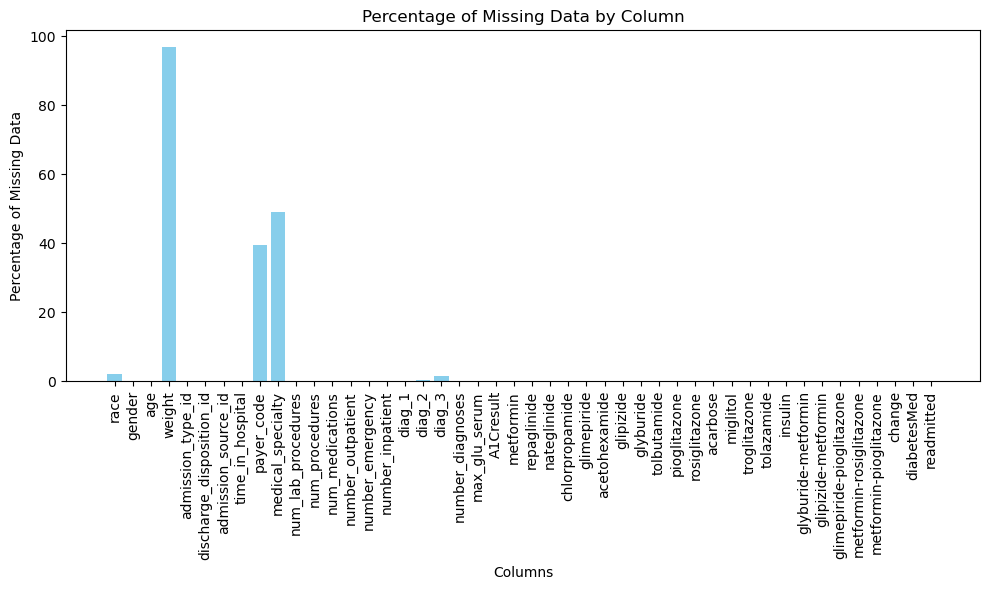

In [20]:
import matplotlib.pyplot as plt

# Calculate the percentage of missing data for each column
missing_percent = data.isnull().mean() * 100

# Create a DataFrame with the column names and the percentage of missing data
missing_data = pd.DataFrame({
    'Column': missing_percent.index,
    'Percent Missing': missing_percent.values
})

# Print out the columns and the percent missing
print(missing_data)

# Create a bar chart to visualize the missing data
plt.figure(figsize=(10, 6))
plt.bar(missing_data['Column'], missing_data['Percent Missing'], color='skyblue')
plt.title('Percentage of Missing Data by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Too many dataset missing for weight and medical specialty. It will help with processing also by dropiing medical specalty.

In [21]:
# create a new dataset removing weight

data = data.drop(['weight', 'medical_specialty'], axis = 1)


In [22]:
data.shape

(100114, 44)

In [23]:
#Imputing Missing value with mode for remaining

missing = ['race','payer_code','diag_1','diag_2','diag_3']

for column in missing:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace = True)
    
# Check
print(data.isnull().sum())

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazo

In [24]:
data1=data

In [25]:
#print(data1.isnull().sum())

<function matplotlib.pyplot.show(close=None, block=None)>

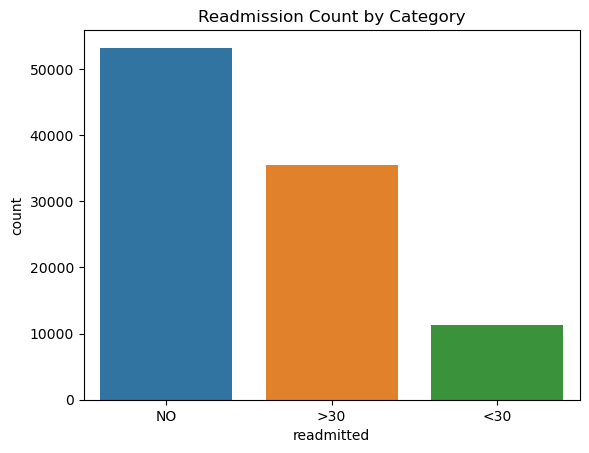

In [55]:
import seaborn as sns

data1['readmitted'].value_counts()

sns.countplot(x=data1['readmitted'], data = data1)
plt.title("Readmission Count by Category")
plt.show

In [141]:


data1.groupby('readmitted')[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']].mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
readmitted,,,,,,,,
<30,4.768249,44.226028,1.280884,16.903143,0.436911,0.357313,1.224003,7.692789
>30,4.495541,43.836601,1.249599,16.282768,0.496329,0.283669,0.838993,7.646898
NO,4.238104,42.072822,1.395550,15.584154,0.270259,0.107401,0.368939,7.189826


In [142]:
num_columns = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']
data1.groupby('readmitted')[num_columns].mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
readmitted,,,,,,,,
<30,4.768249,44.226028,1.280884,16.903143,0.436911,0.357313,1.224003,7.692789
>30,4.495541,43.836601,1.249599,16.282768,0.496329,0.283669,0.838993,7.646898
NO,4.238104,42.072822,1.395550,15.584154,0.270259,0.107401,0.368939,7.189826


In [143]:
data1.groupby('readmitted')[num_columns].median()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
readmitted,,,,,,,,
<30,4.0,45.0,1.0,16.0,0.0,0.0,0.0,9.0
>30,4.0,45.0,1.0,15.0,0.0,0.0,0.0,9.0
NO,3.0,43.0,1.0,14.0,0.0,0.0,0.0,8.0


array([[<Axes: title={'center': 'time_in_hospital'}>,
        <Axes: title={'center': 'num_lab_procedures'}>,
        <Axes: title={'center': 'num_procedures'}>],
       [<Axes: title={'center': 'num_medications'}>,
        <Axes: title={'center': 'number_outpatient'}>,
        <Axes: title={'center': 'number_emergency'}>],
       [<Axes: title={'center': 'number_inpatient'}>,
        <Axes: title={'center': 'number_diagnoses'}>, <Axes: >]],
      dtype=object)

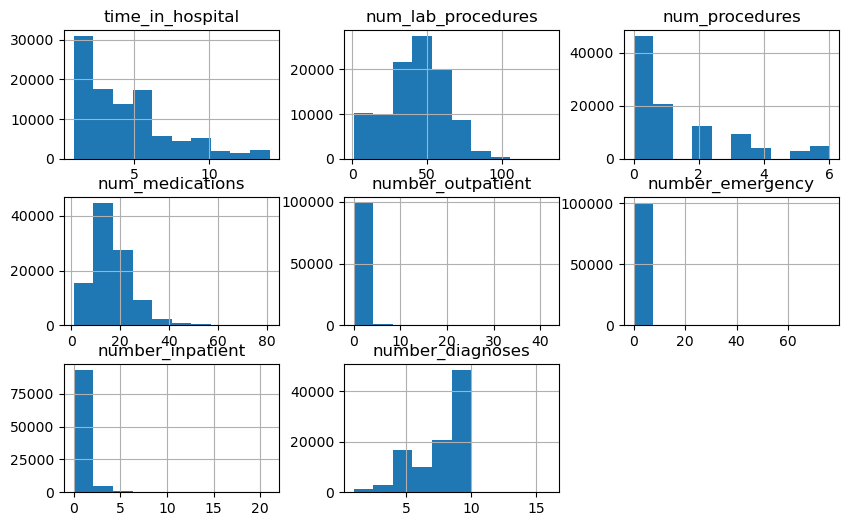

In [144]:
data1[num_columns].hist(bins=10, figsize=(10,6))

<Axes: xlabel='time_in_hospital', ylabel='Count'>

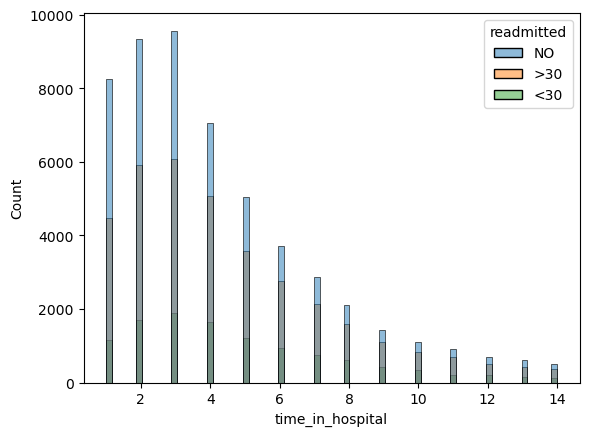

In [145]:
sns.histplot(x='time_in_hospital', hue='readmitted', data =data1)

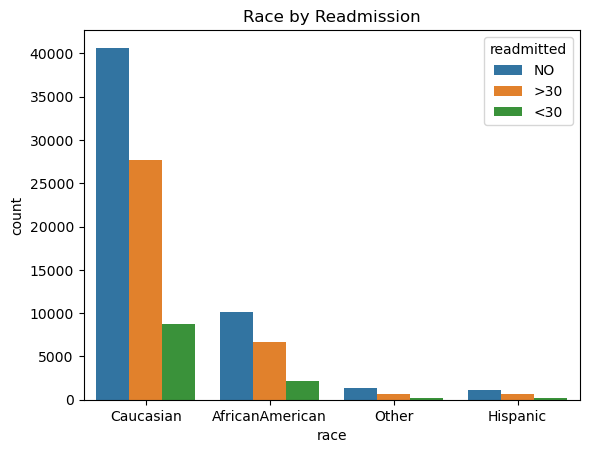

In [61]:
sns.countplot(x='race', hue = 'readmitted', data=data)
plt.title("Race by Readmission")
plt.show()

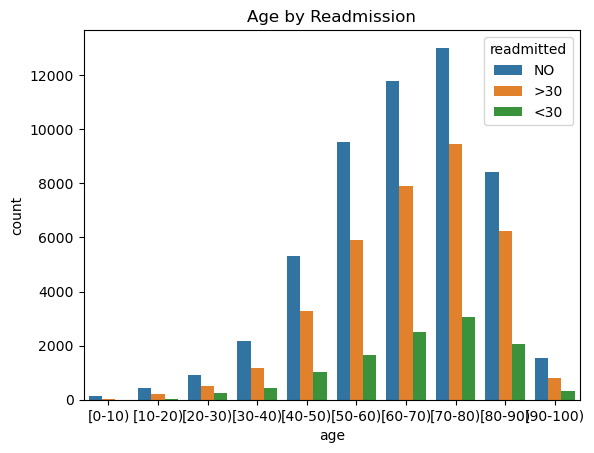

In [57]:
sns.countplot(x='age', hue = 'readmitted', data=data1)
plt.title("Age by Readmission")
plt.show()

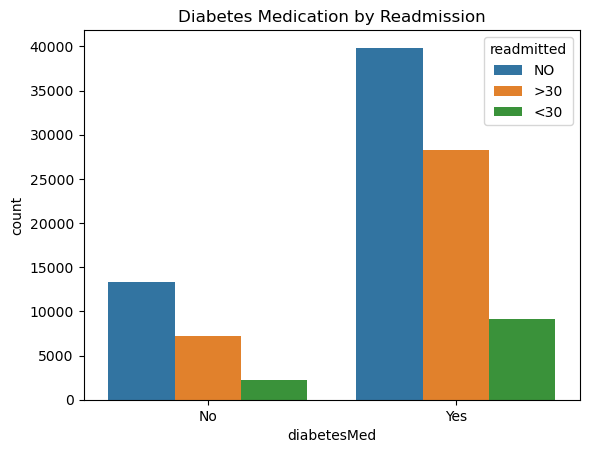

In [58]:
sns.countplot(x='diabetesMed', hue = 'readmitted', data=data1)
plt.title("Diabetes Medication by Readmission")
plt.show()

Text(0.5, 1.0, 'A1C by Readmission')

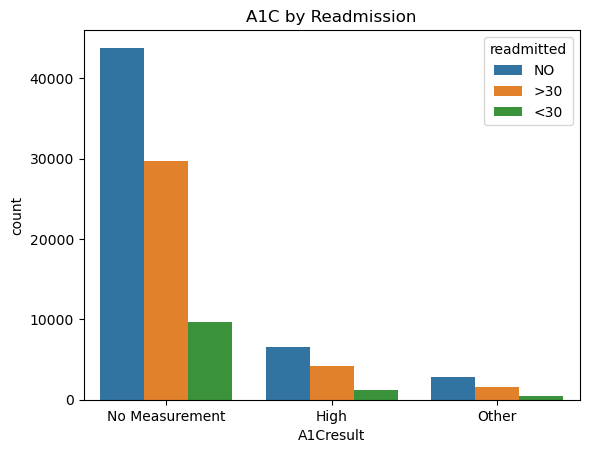

In [62]:
sns.countplot(x='A1Cresult', hue='readmitted', data=data)
plt.title("A1C by Readmission")

Text(0.5, 1.0, 'Insulin by Readmission')

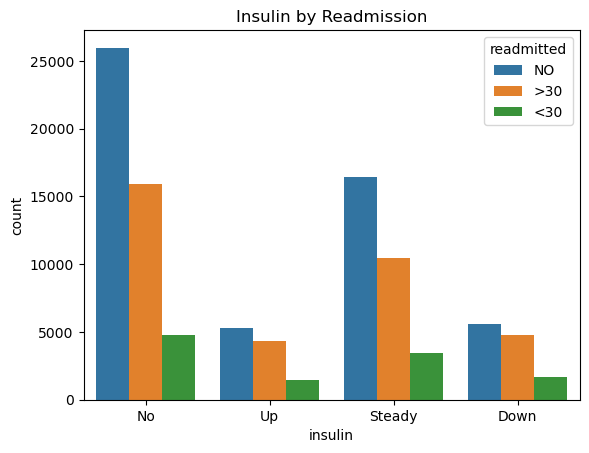

In [60]:
sns.countplot(x='insulin', hue='readmitted', data=data1)
plt.title("Insulin by Readmission")

In [27]:
# Divide the variables into numeric and categorical
numeric = data.select_dtypes(include=['int64','float64']).columns
categorical = data.select_dtypes(include =['object']).columns

print ("Numeric Columns:", numeric)
print ("categorical Columns:", categorical)

Numeric Columns: Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')
categorical Columns: Index(['race', 'gender', 'age', 'payer_code', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [29]:
numeric

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [30]:
# List of categorical columns to inspect (excluding 'readmitted')
categorical_columns = ['race', 'gender', 'age', 'payer_code', 'diag_1', 'diag_2', 'diag_3',
                       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
                       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
                       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin',
                       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                       'metformin-pioglitazone', 'change', 'diabetesMed']

# Inspect the frequency distribution for each categorical column
for column in categorical_columns:
    print(f"--- {column} ---")
    print(data1[column].value_counts(normalize=True))
    print("\n")


--- race ---
race
Caucasian          0.769962
AfricanAmerican    0.188665
Hispanic           0.020217
Other              0.014843
Asian              0.006313
Name: proportion, dtype: float64


--- gender ---
gender
Female             0.537997
Male               0.461973
Unknown/Invalid    0.000030
Name: proportion, dtype: float64


--- age ---
age
[70-80)     0.255329
[60-70)     0.221597
[50-60)     0.170825
[80-90)     0.166870
[40-50)     0.096150
[30-40)     0.037607
[90-100)    0.026650
[20-30)     0.016481
[10-20)     0.006892
[0-10)      0.001598
Name: proportion, dtype: float64


--- payer_code ---
payer_code
MC    0.712488
HM    0.062109
SP    0.049504
BC    0.046197
MD    0.034880
CP    0.024952
UN    0.024222
CM    0.019048
OG    0.010218
PO    0.005853
DM    0.005454
CH    0.001438
WC    0.001348
OT    0.000939
MP    0.000789
SI    0.000549
FR    0.000010
Name: proportion, dtype: float64


--- diag_1 ---
diag_1
428    0.067483
414    0.065475
786    0.040114
410    0.034730

In [31]:
# Function to recode categories based on a frequency threshold
def recode_column_based_on_threshold(df, column_name, threshold):
    freq = df[column_name].value_counts(normalize=True)  # Get normalized frequencies
    rare_categories = freq[freq < threshold].index       # Find rare categories below threshold
    df[column_name] = df[column_name].apply(lambda x: 'Other' if x in rare_categories else x)  # Replace with 'Other'
    return df

# Example thresholds for each column
thresholds = {
    'race': 0.01,               # 1% threshold for 'race'
    'gender': 0.0001,           # 0.01% threshold for 'gender'
    'payer_code': 0.03,         # 3% threshold for 'payer_code'
    'diag_1': 0.01,             # 1% threshold for 'diag_1'
    'diag_2': 0.01,             # 1% threshold for 'diag_2'
    'diag_3': 0.01,             # 1% threshold for 'diag_3'
    'max_glu_serum': 0.02,      # 2% threshold for 'max_glu_serum'
    'A1Cresult': 0.05,          # 5% threshold for 'A1Cresult'
    'metformin': 0.01,          # 1% threshold for 'metformin'
    'insulin': 0.05,            # 5% threshold for 'insulin'
    # Add thresholds for other medications and columns
}

# Apply the recoding function to each column
for column, threshold in thresholds.items():
    data1 = recode_column_based_on_threshold(data1, column, threshold)

# Check the recoded columns
print(data1.head())


              race  gender      age  admission_type_id  \
0        Caucasian  Female   [0-10)                  6   
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1         MC   
1                         1                    7                 3         MC   
2                         1                    7                 2         MC   
3                         1                    7                 2         MC   
4                         1                    7                 1         MC   

   num_lab_procedures  num_procedures  ...  tolazamide  insulin  \
0                  41               0  ...          No       No   
1                  59         

In [32]:
import pandas as pd

# List of categorical columns (excluding the target 'readmitted')
categorical_columns = data1.select_dtypes(include=['object']).columns.drop('readmitted')

# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data1, columns=categorical_columns, drop_first=True)

# Check the shape of the new DataFrame after one-hot encoding
print("Shape of the data after one-hot encoding:", data_encoded.shape)

# Check the first few rows of the one-hot encoded data
print(data_encoded.head())



Shape of the data after one-hot encoding: (100114, 151)
   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  ..

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply the scaler to only the numerical columns
data_encoded[numeric] = scaler.fit_transform(data_encoded[numeric])

# Verify the normalization
print(data_encoded[numeric].describe())


       admission_type_id  discharge_disposition_id  admission_source_id  \
count      100114.000000             100114.000000        100114.000000   
mean            0.146942                  0.096097             0.197433   
std             0.206604                  0.193981             0.169434   
min             0.000000                  0.000000             0.000000   
25%             0.000000                  0.000000             0.000000   
50%             0.000000                  0.000000             0.250000   
75%             0.285714                  0.074074             0.250000   
max             1.000000                  1.000000             1.000000   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     100114.000000       100114.000000   100114.000000    100114.000000   
mean           0.260742            0.320178        0.221787         0.187273   
std            0.228810            0.149778        0.283381         0.101156   
min 

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler
scaler = StandardScaler()

# Apply the scaler to only the numerical columns
data_encoded[numeric] = scaler.fit_transform(data_encoded[numeric])

# Verify the normalization
print(data_encoded[numeric].describe())


       admission_type_id  discharge_disposition_id  admission_source_id  \
count       1.001140e+05              1.001140e+05         1.001140e+05   
mean       -2.157590e-17              5.450754e-17        -1.369786e-16   
std         1.000005e+00              1.000005e+00         1.000005e+00   
min        -7.112325e-01             -4.953966e-01        -1.165256e+00   
25%        -7.112325e-01             -4.953966e-01        -1.165256e+00   
50%        -7.112325e-01             -4.953966e-01         3.102534e-01   
75%         6.716847e-01             -1.135325e-01         3.102534e-01   
max         4.128978e+00              4.659770e+00         4.736782e+00   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      1.001140e+05        1.001140e+05    1.001140e+05     1.001140e+05   
mean      -3.491890e-17        4.031287e-17    1.940412e-16     1.053245e-16   
std        1.000005e+00        1.000005e+00    1.000005e+00     1.000005e+00   
min 

In [63]:
data_encoded.head(25)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,2.746061,4.086974,-1.165256,-1.139562,-0.099043,-0.782651,-1.851329,-0.292270,-0.212001,-0.501518,...,False,True,False,False,False,False,False,False,True,False
1,-0.711233,-0.495397,0.310253,-0.467184,0.818349,-0.782651,0.249390,-0.292270,-0.212001,-0.501518,...,True,True,False,False,False,False,False,False,False,True
2,-0.711233,-0.495397,0.310253,-0.803373,-1.628029,2.158047,-0.368469,1.290009,-0.212001,0.290984,...,False,True,False,False,False,False,False,False,True,True
3,-0.711233,-0.495397,0.310253,-0.803373,0.053856,-0.194511,0.002246,-0.292270,-0.212001,-0.501518,...,True,True,False,False,False,False,False,False,False,True
4,-0.711233,-0.495397,0.310253,-1.139562,0.410619,-0.782651,-0.986327,-0.292270,-0.212001,-0.501518,...,False,True,False,False,False,False,False,False,False,True
5,-0.019774,-0.495397,-0.919338,-0.467184,-0.608705,2.746186,0.002246,-0.292270,-0.212001,-0.501518,...,False,True,False,False,False,False,False,False,True,True
6,0.671685,-0.495397,-0.919338,-0.130995,1.378977,-0.194511,0.620105,-0.292270,-0.212001,-0.501518,...,False,True,False,False,False,False,False,False,False,True
7,-0.711233,-0.495397,0.310253,0.205194,1.531876,-0.782651,-0.492040,-0.292270,-0.212001,-0.501518,...,False,True,False,False,False,False,False,False,True,True
8,-0.019774,-0.495397,-0.427501,2.894707,1.277045,0.393628,1.485106,-0.292270,-0.212001,-0.501518,...,False,True,False,False,False,False,False,False,False,True
9,0.671685,-0.113532,-0.427501,2.558518,-0.506773,0.981768,0.249390,-0.292270,-0.212001,-0.501518,...,False,True,False,False,False,False,False,False,False,True


In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 #Prepare data (features and target)
X = data_encoded.drop('readmitted', axis=1)  # Features
y = data_encoded['readmitted']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

#  hyperparameter distribution for Randomized Search
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l1', 'l2'],   # Regularization type
    'solver': ['liblinear', 'lbfgs'],  # Solvers that work with different penalties
}

#  Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    log_reg,        # Logistic Regression model
    param_dist,     # Parameter distribution
    n_iter=10,      # Number of random combinations to try
    cv=3,           # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric (accuracy)
    n_jobs=-1,      # Use all available CPU cores
    random_state=112  # Ensures reproducibility
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

#  the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

#  best cross-validation score
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# the model on the test data
best_model = random_search.best_estimator_  # Get the best model from the search
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _ch

Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
Best Cross-Validation Accuracy: 0.5733353310609183
Test Accuracy: 0.5719422663936473


C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# the logistic regression model with the best hyperparameters
best_log_reg = LogisticRegression(solver='lbfgs', penalty='l2', C=10, max_iter=1000)

#  5-fold cross-validation
cv_scores = cross_val_score(best_log_reg, X, y, cv=5, scoring='accuracy')

#  cross-validation results
print("5-Fold Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:", cv_scores.std())

#  final model on the entire training data
best_log_reg.fit(X_train, y_train)

# the model on the test set
y_pred = best_log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy after Cross-Validation:", test_accuracy)


C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

5-Fold Cross-Validation Scores: [0.55880737 0.56210358 0.55446237 0.57923388 0.58086105]
Mean Cross-Validation Accuracy: 0.5670936509119797
Standard Deviation of Cross-Validation Accuracy: 0.010863140148423883
Test Accuracy after Cross-Validation: 0.5719422663936473


C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


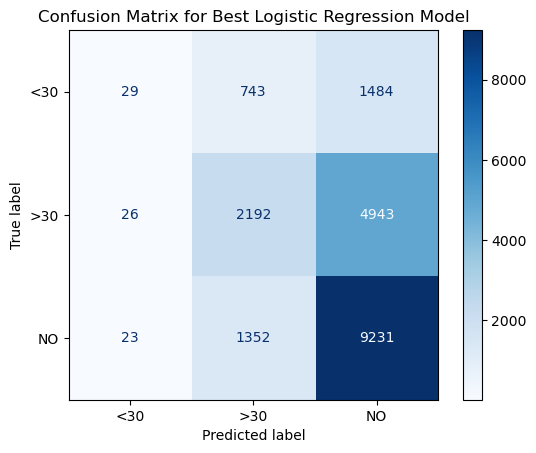

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit the logistic regression model on the training data
best_log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Logistic Regression Model')
plt.show()


Top 5 Important Features:
                     Feature  Coefficient  Importance
122      tolbutamide_Steady    -1.578314    1.578314
111       chlorpropamide_Up    -0.969612    0.969612
143  glyburide-metformin_Up    -0.966492    0.966492
130         acarbose_Steady    -0.895935    0.895935
133         miglitol_Steady    -0.791289    0.791289


C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


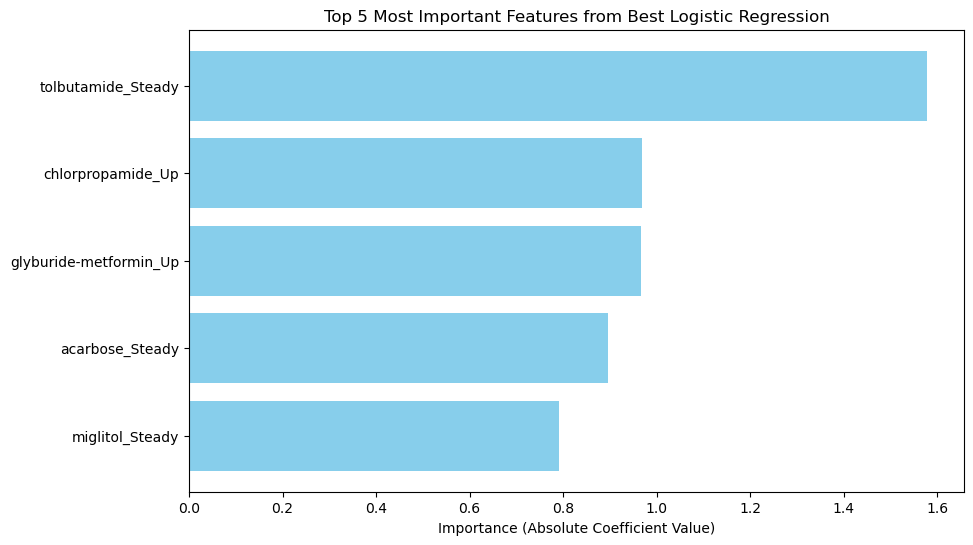

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fit the best logistic regression model (if not already done)
best_log_reg.fit(X_train, y_train)

# Step 2: Get the feature importance (coefficients) from the best model
coefficients = best_log_reg.coef_[0]

# Step 3: Create a DataFrame to associate features with their importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Step 4: Calculate the absolute value of the coefficients to get importance
feature_importance['Importance'] = np.abs(feature_importance['Coefficient'])

# Step 5: Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Step 6: List the top 5 most important features
top_5_features = feature_importance.head(5)
print("Top 5 Important Features:\n", top_5_features)

# Step 7: Plot the top 5 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.title('Top 5 Most Important Features from Best Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


In [47]:
import numpy as np
import pandas as pd

# Step 1: Ensure the best logistic regression model is fitted (if not already done)
best_log_reg.fit(X_train, y_train)

# Step 2: Get the feature importance (coefficients) from the best model
coefficients = best_log_reg.coef_[0]

# Step 3: Create a DataFrame to associate features with their importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Step 4: Calculate the absolute value of the coefficients to get importance
feature_importance['Importance'] = np.abs(feature_importance['Coefficient'])

# Step 5: Sort all features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Step 6: List all the features with their importance
print("All Features with Importance:\n")
print(feature_importance)


All Features with Importance:

                    Feature  Coefficient  Importance
122      tolbutamide_Steady    -1.578314    1.578314
111       chlorpropamide_Up    -0.969612    0.969612
143  glyburide-metformin_Up    -0.966492    0.966492
130         acarbose_Steady    -0.895935    0.895935
133         miglitol_Steady    -0.791289    0.791289
..                      ...          ...         ...
69               diag_2_518     0.007121    0.007121
7         number_outpatient     0.002616    0.002616
81               diag_3_285     0.002385    0.002385
49               diag_1_820    -0.001873    0.001873
82               diag_3_401     0.000517    0.000517

[150 rows x 3 columns]


C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Increase the number of rows to display in pandas
pd.set_option('display.max_rows', None)

# Print all the features with their importance
print("All Features with Importance:\n")
print(feature_importance)

# Reset to default after showing
pd.reset_option('display.max_rows')


All Features with Importance:

                             Feature  Coefficient  Importance
122               tolbutamide_Steady    -1.578314    1.578314
111                chlorpropamide_Up    -0.969612    0.969612
143           glyburide-metformin_Up    -0.966492    0.966492
130                  acarbose_Steady    -0.895935    0.895935
133                  miglitol_Steady    -0.791289    0.791289
136                tolazamide_Steady    -0.756257    0.756257
134                      miglitol_Up    -0.748518    0.748518
129                      acarbose_No    -0.720478    0.720478
22                       age_[70-80)     0.679682    0.679682
23                       age_[80-90)     0.675658    0.675658
17                       age_[20-30)     0.635148    0.635148
21                       age_[60-70)     0.630844    0.630844
107               nateglinide_Steady     0.602270    0.602270
24                      age_[90-100)     0.593057    0.593057
18                       age_[30-40)   

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric
vif_data['VIF'] = [variance_inflation_factor(X_train[numeric].values, i) 
                   for i in range(len(numeric))]

print(vif_data)


                     Feature       VIF
0          admission_type_id  1.101217
1   discharge_disposition_id  1.042392
2        admission_source_id  1.057524
3           time_in_hospital  1.393666
4         num_lab_procedures  1.179556
5             num_procedures  1.228841
6            num_medications  1.549912
7          number_outpatient  1.028423
8           number_emergency  1.088370
9           number_inpatient  1.108785
10          number_diagnoses  1.137363


LogisticRegCV